In [1]:
import os
from Bio import SeqIO
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from pandas import DataFrame
from sklearn.cluster import KMeans
import math

In [2]:
notebook_path = os.path.abspath("genomeClustering.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "data/J29B_expected.fasta")
pathFASTQ= os.path.join(os.path.dirname(notebook_path), "data/fastq/J29_B_CE_IonXpress_005.fastq")

expected = list(SeqIO.parse(path, "fasta"))
    
from Bio import Align
aligner = Align.PairwiseAligner()
aligner.mode = 'global'

aligner.match_score = 2
aligner.mismatch_score = -1
aligner.open_gap_score = 0
aligner.extend_gap_score = 0
aligner.target_end_gap_score = 0
aligner.query_end_gap_score = 0

#print(aligner.query_end_gap_score)


expAlign1 = aligner.align(expected[0].seq,expected[1].seq)
print("JELEN 5-6 = ",249-expAlign1[0].score, "Number of alignments: %d" % len(expAlign1))
expAlign2 = aligner.align(expected[1].seq,expected[2].seq)
print("JELEN 6-7 = ",249-expAlign2[0].score, "Number of alignments: %d" % len(expAlign2))
expAlign3 = aligner.align(expected[0].seq,expected[2].seq)
print("JELEN 5-7 = ",249-expAlign3[0].score, "Number of alignments: %d" % len(expAlign3))

data = list(SeqIO.parse(pathFASTQ, "fastq"))



JELEN 5-6 =  -225.0 Number of alignments: 24192
JELEN 6-7 =  -205.0 Number of alignments: 2523156480
JELEN 5-7 =  -201.0 Number of alignments: 17557585920


In [3]:
sizedReadings = []

for dataDistances in data:
    if(len(dataDistances.seq)==296):
        sizedReadings.append(dataDistances.seq[27:-20])
df = DataFrame(np.zeros((len(sizedReadings)+3, len(sizedReadings))))

for i in range(0, len(sizedReadings)):
    for j in range(i, len(sizedReadings)):
        distance = aligner.align(sizedReadings[i], sizedReadings[j]).score
        df[i][j] = distance
        df[j][i] = distance
print(df)

       0      1      2      3      4      5      6      7      8      9    \
0    498.0  492.0  494.0  470.0  468.0  494.0  492.0  466.0  470.0  470.0   
1    492.0  498.0  494.0  472.0  470.0  496.0  492.0  468.0  472.0  472.0   
2    494.0  494.0  498.0  472.0  470.0  496.0  494.0  468.0  472.0  472.0   
3    470.0  472.0  472.0  498.0  496.0  474.0  470.0  494.0  498.0  498.0   
4    468.0  470.0  470.0  496.0  498.0  472.0  468.0  494.0  496.0  496.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
836  470.0  472.0  472.0  498.0  496.0  474.0  470.0  494.0  498.0  498.0   
837  470.0  470.0  474.0  496.0  494.0  472.0  470.0  492.0  496.0  496.0   
838    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
839    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
840    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

     ...    828    829    830    831    832    833    834    835    836    

In [4]:
for i in range(0, len(sizedReadings)):
    df[i][len(sizedReadings)] = aligner.align(expected[0].seq, sizedReadings[i]).score
    df[i][len(sizedReadings)+1] = aligner.align(expected[1].seq, sizedReadings[i]).score
    df[i][len(sizedReadings)+2] = aligner.align(expected[2].seq, sizedReadings[i]).score

print(df)
    
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])


       0      1      2      3      4      5      6      7      8      9    \
0    498.0  492.0  494.0  470.0  468.0  494.0  492.0  466.0  470.0  470.0   
1    492.0  498.0  494.0  472.0  470.0  496.0  492.0  468.0  472.0  472.0   
2    494.0  494.0  498.0  472.0  470.0  496.0  494.0  468.0  472.0  472.0   
3    470.0  472.0  472.0  498.0  496.0  474.0  470.0  494.0  498.0  498.0   
4    468.0  470.0  470.0  496.0  498.0  472.0  468.0  494.0  496.0  496.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
836  470.0  472.0  472.0  498.0  496.0  474.0  470.0  494.0  498.0  498.0   
837  470.0  470.0  474.0  496.0  494.0  472.0  470.0  492.0  496.0  496.0   
838  470.0  472.0  472.0  498.0  496.0  474.0  470.0  494.0  498.0  498.0   
839  494.0  496.0  496.0  474.0  472.0  498.0  494.0  470.0  474.0  474.0   
840  452.0  452.0  452.0  450.0  448.0  454.0  450.0  446.0  450.0  450.0   

     ...    828    829    830    831    832    833    834    835    836    

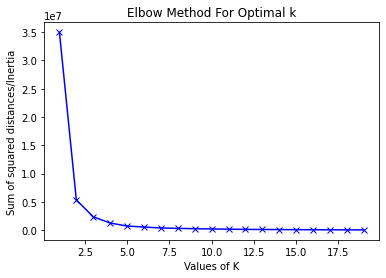

In [5]:
K = range(1,20)
Sum_of_squared_distance = []
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(principalDf)
 Sum_of_squared_distance.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distance,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

             PC1         PC2
838   -71.233940   -1.865907
839   601.801522 -118.067590
840  1266.696066  174.737952
-71.23394049501155 -1.8659066263528368
601.8015215603573 -118.06758981737457
1266.6960659210529 174.73795242863417


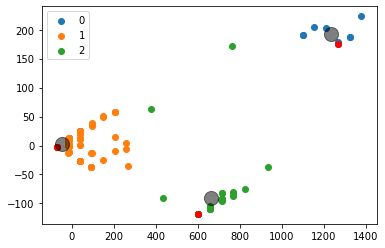

In [6]:
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(principalDf)
#print(label)

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(principalComponents[label == i , 0] , principalComponents[label == i , 1] , label = i)


df2 = pd.DataFrame(data=principalDf.tail(3))
print(df2)
for i in range(0,len(df2)):
    print(df2.iloc[i]['PC1'], df2.iloc[i]['PC2'])
    plt.scatter(df2.iloc[i]['PC1'], df2.iloc[i]['PC2'], color='red')

    
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.legend()
plt.show()

In [7]:
dataframe_min = principalDf.min()
dataframe_max = principalDf.max()

data_dis_X = math.dist([dataframe_min['PC1']], [dataframe_max['PC1']])
data_dis_Y = math.dist([dataframe_min['PC2']], [dataframe_max['PC2']])

dis_sum = 0
for i in range(0, 3):
    for j in range(0, 3):
        if(label[len(principalDf)-1-j] == i):
            dis_X = math.dist([principalDf.iloc[len(principalDf)-1-j]['PC1']], [kmeans.cluster_centers_[i][0]])
            dis_Y = math.dist([principalDf.iloc[len(principalDf)-1-j]['PC2']], [kmeans.cluster_centers_[i][1]])
            dis_sum += (dis_X/data_dis_X + dis_Y/data_dis_Y)/6

print('Točnost modela je: ', 1-dis_sum)

Točnost modela je:  0.9620430419593089


## Izračunavanje za J30 

In [8]:
notebook_path = os.path.abspath("genomeClustering.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "data/J30B_expected.fasta")
pathFASTQ= os.path.join(os.path.dirname(notebook_path), "data/fastq/J30_B_CE_IonXpress_006.fastq")

expected = list(SeqIO.parse(path, "fasta"))

expAlign1 = aligner.align(expected[0].seq,expected[1].seq)
print("JELEN 5-6 = ",249-expAlign1[0].score, "Number of alignments: %d" % len(expAlign1))
expAlign2 = aligner.align(expected[1].seq,expected[2].seq)
print("JELEN 6-7 = ",249-expAlign2[0].score, "Number of alignments: %d" % len(expAlign2))
expAlign3 = aligner.align(expected[0].seq,expected[2].seq)
print("JELEN 5-7 = ",249-expAlign3[0].score, "Number of alignments: %d" % len(expAlign3))

data = list(SeqIO.parse(pathFASTQ, "fastq"))



JELEN 5-6 =  -201.0 Number of alignments: 118516608000
JELEN 6-7 =  -191.0 Number of alignments: 6280569446400
JELEN 5-7 =  -209.0 Number of alignments: 3207859200


In [9]:
sizedReadings = []

for dataDistances in data:
    if(len(dataDistances.seq)<=296 and len(dataDistances.seq)>290):
        sizedReadings.append(dataDistances.seq[27:-20])
df = DataFrame(np.zeros((len(sizedReadings)+3, len(sizedReadings))))

for i in range(0, len(sizedReadings)):
    for j in range(i, len(sizedReadings)):
        distance = aligner.align(sizedReadings[i], sizedReadings[j]).score
        df[i][j] = distance
        df[j][i] = distance
print(df)

       0      1      2      3      4      5      6      7      8      9     \
0     498.0  494.0  448.0  448.0  474.0  446.0  448.0  496.0  492.0  446.0   
1     494.0  496.0  448.0  448.0  474.0  446.0  448.0  496.0  490.0  446.0   
2     448.0  448.0  496.0  490.0  464.0  430.0  496.0  450.0  446.0  492.0   
3     448.0  448.0  490.0  496.0  464.0  430.0  492.0  450.0  446.0  492.0   
4     474.0  474.0  464.0  464.0  498.0  432.0  464.0  476.0  470.0  462.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1285  448.0  448.0  496.0  492.0  464.0  432.0  498.0  450.0  446.0  494.0   
1286  448.0  448.0  494.0  494.0  464.0  432.0  496.0  450.0  446.0  496.0   
1287    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1288    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1289    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...   1277   1278   1279   1280   1281   1282   1283   12

In [10]:
for i in range(0, len(sizedReadings)):
    df[i][len(sizedReadings)] = aligner.align(expected[0].seq, sizedReadings[i]).score
    df[i][len(sizedReadings)+1] = aligner.align(expected[1].seq, sizedReadings[i]).score
    df[i][len(sizedReadings)+2] = aligner.align(expected[2].seq, sizedReadings[i]).score

print(df)
    
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])


       0      1      2      3      4      5      6      7      8      9     \
0     498.0  494.0  448.0  448.0  474.0  446.0  448.0  496.0  492.0  446.0   
1     494.0  496.0  448.0  448.0  474.0  446.0  448.0  496.0  490.0  446.0   
2     448.0  448.0  496.0  490.0  464.0  430.0  496.0  450.0  446.0  492.0   
3     448.0  448.0  490.0  496.0  464.0  430.0  492.0  450.0  446.0  492.0   
4     474.0  474.0  464.0  464.0  498.0  432.0  464.0  476.0  470.0  462.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1285  448.0  448.0  496.0  492.0  464.0  432.0  498.0  450.0  446.0  494.0   
1286  448.0  448.0  494.0  494.0  464.0  432.0  496.0  450.0  446.0  496.0   
1287  496.0  496.0  450.0  450.0  476.0  448.0  450.0  498.0  492.0  448.0   
1288  448.0  448.0  496.0  492.0  464.0  432.0  498.0  450.0  446.0  494.0   
1289  456.0  456.0  438.0  438.0  442.0  484.0  440.0  458.0  452.0  438.0   

      ...   1277   1278   1279   1280   1281   1282   1283   12

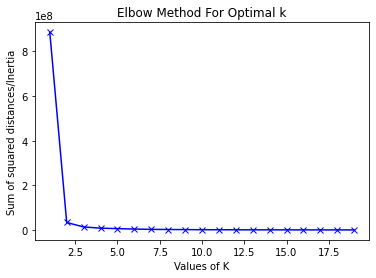

In [11]:
K = range(1,20)
Sum_of_squared_distance = []
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(principalDf)
 Sum_of_squared_distance.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distance,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

             PC1         PC2
1287 -741.257647  -47.203039
1288  936.695069  -47.423232
1289  -96.699922  831.502313
-741.2576467024048 -47.20303882712757
936.6950687723523 -47.42323227847474
-96.69992207246025 831.5023125555342


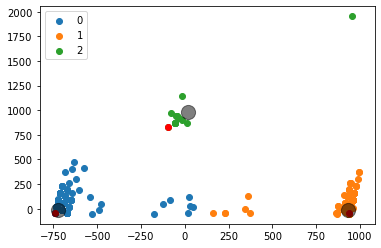

In [14]:
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(principalDf)
#print(label)

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(principalComponents[label == i , 0] , principalComponents[label == i , 1] , label = i)


df2 = pd.DataFrame(data=principalDf.tail(3))
print(df2)
for i in range(0,len(df2)):
    print(df2.iloc[i]['PC1'], df2.iloc[i]['PC2'])
    plt.scatter(df2.iloc[i]['PC1'], df2.iloc[i]['PC2'], color='red')

    
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.legend()
plt.show()

In [15]:
dataframe_min = principalDf.min()
dataframe_max = principalDf.max()

data_dis_X = math.dist([dataframe_min['PC1']], [dataframe_max['PC1']])
data_dis_Y = math.dist([dataframe_min['PC2']], [dataframe_max['PC2']])

dis_sum = 0
for i in range(0, 3):
    for j in range(0, 3):
        if(label[len(principalDf)-1-j] == i):
            dis_X = math.dist([principalDf.iloc[len(principalDf)-1-j]['PC1']], [kmeans.cluster_centers_[i][0]])
            dis_Y = math.dist([principalDf.iloc[len(principalDf)-1-j]['PC2']], [kmeans.cluster_centers_[i][1]])
            dis_sum += (dis_X/data_dis_X + dis_Y/data_dis_Y)/6

print('Točnost modela je: ', 1-dis_sum)

Točnost modela je:  0.9680261842867234
